# Frequent Count Imputation

# Handling Categorical Data

In [12]:
df.columns

Index(['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'], dtype='object')

In [1]:
import pandas as pd
df=pd.read_csv('train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [31]:
df.head(10)

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
5,Gd,Gd,Attchd,143000
6,Ex,Gd,Attchd,307000
7,Gd,TA,Attchd,200000
8,TA,TA,Detchd,129900
9,TA,TA,Attchd,118000


In [10]:
df.columns

Index(['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'], dtype='object')

In [13]:
df.isnull().sum()  ##Bsmt and Garage as they have less null values

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [14]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

In [16]:
df.shape

(1460, 4)

In [17]:
df.groupby(['BsmtQual'])['BsmtQual'].count()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

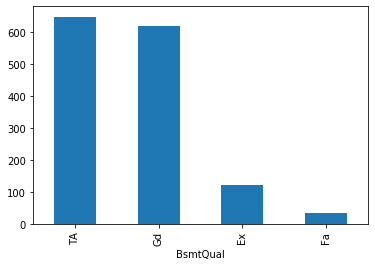

In [18]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

In [22]:
df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

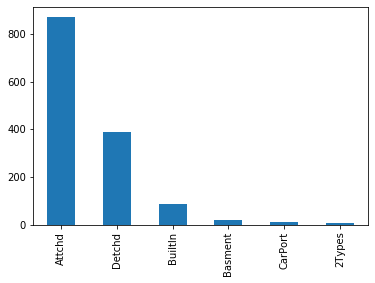

In [24]:
df['GarageType'].value_counts().plot.bar()

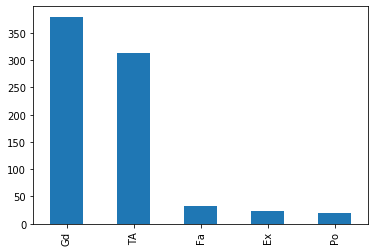

In [25]:
df['FireplaceQu'].value_counts().plot.bar()

In [26]:
df['GarageType'].value_counts().index

Index(['Attchd', 'Detchd', 'BuiltIn', 'Basment', 'CarPort', '2Types'], dtype='object')

In [27]:
df['GarageType'].value_counts().index[0]

'Attchd'

In [28]:
df['GarageType'].value_counts()[0]

870

In [29]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category,inplace=True)
    
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [30]:
df.head(10)

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
5,Gd,Gd,Attchd,143000
6,Ex,Gd,Attchd,307000
7,Gd,TA,Attchd,200000
8,TA,TA,Detchd,129900
9,TA,TA,Attchd,118000


In [35]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

# Adding a Variable to Capture NAN

In [48]:
df=pd.read_csv('train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [42]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [2]:
import numpy as np
df['BsmtQual_var']=np.where(df['BsmtQual'].isnull(),1,0)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [52]:
freq=df['BsmtQual'].mode()[0]
df['BsmtQual'].fillna(freq,inplace=True)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,FireplaceQu_var,BsmtQual_var
0,Gd,Gd,Attchd,208500,1,0
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


In [49]:
df['FireplaceQu_var']=np.where(df['FireplaceQu'].isnull(),1,0) ##works well with huge no of nan

In [53]:
freq=df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(freq,inplace=True)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,FireplaceQu_var,BsmtQual_var
0,Gd,Gd,Attchd,208500,1,0
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


# Capturing NAN with new Category

In [58]:
df=pd.read_csv('train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
def impute_nan(df,variable):
    df[variable+"_newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)
    
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [61]:
df=df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)## most used technique

In [62]:
df.head()

,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd


# One Hot Encoding

In [66]:
df=pd.read_csv('titanic.csv',usecols=["Sex"])

In [67]:
df.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [68]:
pd.get_dummies(df).head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [69]:
pd.get_dummies(df,drop_first=True).head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [70]:
df=pd.read_csv('titanic.csv',usecols=["Embarked"])
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [71]:
df.dropna(inplace=True)

In [72]:
df.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [73]:
pd.get_dummies(df,drop_first=False).head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [74]:
 pd.get_dummies(df,drop_first=True).head()##creates more features disadvantage

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


# One Hot Encoding with many features

In [75]:
df=pd.read_csv('MercedezBenz.csv',usecols="X0","X1","X2","X3","X3","X4","X5","X6")
df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [76]:
df["X0"].value_counts()

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
ai     34
m      34
e      32
ba     27
at     25
a      21
ax     19
aq     18
i      18
am     18
u      17
l      16
aw     16
ad     14
k      11
b      11
au     11
r      10
as     10
bc      6
ao      4
c       3
q       2
aa      2
g       1
ac      1
ab      1
Name: X0, dtype: int64

In [78]:
df["X0"].unique()

array(['k', 'az', 't', 'al', 'o', 'w', 'j', 'h', 's', 'n', 'ay', 'f', 'x',
       'y', 'aj', 'ak', 'am', 'z', 'q', 'at', 'ap', 'v', 'af', 'a', 'e',
       'ai', 'd', 'aq', 'c', 'aa', 'ba', 'as', 'i', 'r', 'b', 'ax', 'bc',
       'u', 'ad', 'au', 'm', 'l', 'aw', 'ao', 'ac', 'g', 'ab'],
      dtype=object)

In [79]:
len(df["X0"].unique())

47

In [81]:
for i in df.columns:
    print(len(df[i].unique()))

4209
2545
47
27
44
7
4
29
12
25
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
2
2
1
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


In [99]:
import pandas as pd
import numpy as np

In [83]:
df.X1.value_counts().sort_values(ascending=False).head(10) ##KDD competetion TOP 10 values

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
Name: X1, dtype: int64

In [118]:
lst=df.X1.value_counts().sort_values(ascending=False).head(10).index

lst
lst1=lst.tolist()
##convert to list
lst1



['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [112]:
import numpy as np
for categories in lst:
    df[categories]=np.where(df["X1"]==categories,1,0)


In [119]:
df[lst1]

,aa,s,b,l,v,r,i,a,c,o
0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4204,0,1,0,0,0,0,0,0,0,0
4205,0,0,0,0,0,0,0,0,0,1
4206,0,0,0,0,1,0,0,0,0,0
4207,0,0,0,0,0,1,0,0,0,0


In [120]:
lst1.append('X1')


In [121]:
df[lst1]

,aa,s,b,l,v,r,i,a,c,o,X1
0,0,0,0,0,1,0,0,0,0,0,v
1,0,0,0,0,0,0,0,0,0,0,t
2,0,0,0,0,0,0,0,0,0,0,w
3,0,0,0,0,0,0,0,0,0,0,t
4,0,0,0,0,1,0,0,0,0,0,v
...,...,...,...,...,...,...,...,...,...,...,...
4204,0,1,0,0,0,0,0,0,0,0,s
4205,0,0,0,0,0,0,0,0,0,1,o
4206,0,0,0,0,1,0,0,0,0,0,v
4207,0,0,0,0,0,1,0,0,0,0,r


# Ordinal Number Encoding

In [16]:
 import datetime  ##Label Encoding
import calendar
today_date=datetime.datetime.today()
today_date

datetime.datetime(2020, 8, 29, 16, 22, 36, 656863)

In [5]:
today_date-datetime.timedelta(1)

datetime.datetime(2020, 8, 28, 16, 11, 12, 857386)

In [6]:
##list Comprehension
days=[today_date-datetime.timedelta(x) for x in range(0,15)]

In [7]:
data=pd.DataFrame(days)
data
                  

,0
0,2020-08-29 16:11:12.857386
1,2020-08-28 16:11:12.857386
2,2020-08-27 16:11:12.857386
3,2020-08-26 16:11:12.857386
4,2020-08-25 16:11:12.857386
5,2020-08-24 16:11:12.857386
6,2020-08-23 16:11:12.857386
7,2020-08-22 16:11:12.857386
8,2020-08-21 16:11:12.857386
9,2020-08-20 16:11:12.857386


In [11]:
data.columns=['Day']

In [12]:
data.head()

,Day
0,2020-08-29 16:11:12.857386
1,2020-08-28 16:11:12.857386
2,2020-08-27 16:11:12.857386
3,2020-08-26 16:11:12.857386
4,2020-08-25 16:11:12.857386


In [14]:
data['Day'].dt.weekday_name

AttributeError: 'DatetimeProperties' object has no attribute 'weekday_name'

In [1]:

import pandas as pd
import numpy as np
df=pd.read_csv('titanic.csv')

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Count or Frequency Encoding

In [3]:
for feature in df.columns[:]:
    print(feature,":",len(df[feature].unique()),'labels')

PassengerId : 891 labels
Survived : 2 labels
Pclass : 3 labels
Name : 891 labels
Sex : 2 labels
Age : 89 labels
SibSp : 7 labels
Parch : 7 labels
Ticket : 681 labels
Fare : 248 labels
Cabin : 148 labels
Embarked : 4 labels


In [6]:
cabin_map= df['Embarked'].value_counts().to_dict()

In [7]:
df['Embarked']=df['Embarked'].map(cabin_map)
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,644.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,168.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,644.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,644.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,644.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,77.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,644.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,644.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,644.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,168.0


# Target Guided Ordinal Encoding

In [10]:
df=pd.read_csv('titanic.csv',usecols=['Cabin','Survived'])   ##Ordering labels according to target. 
##Replace the label with joint probability of 0 to 1.
df.head()


,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [11]:
df['Cabin'].fillna("Misssing",inplace=True)
df.head()

,Survived,Cabin
0,0,Misssing
1,1,C85
2,1,Misssing
3,1,C123
4,0,Misssing


In [16]:
df['Cabin']=df['Cabin'].astype(str).str[0]
df['Cabin']

0      M
1      C
2      M
3      C
4      M
      ..
886    M
887    B
888    M
889    C
890    M
Name: Cabin, Length: 891, dtype: object

In [15]:
df.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [18]:
df.groupby(['Cabin'])['Survived'].mean().sort_values()

Cabin
T    0.000000
M    0.299854
A    0.466667
G    0.500000
C    0.593220
F    0.615385
B    0.744681
E    0.750000
D    0.757576
Name: Survived, dtype: float64

In [19]:
df.groupby(['Cabin'])['Survived'].mean().sort_values().index

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [20]:
ordinal_labels=df.groupby(['Cabin'])['Survived'].mean().sort_values().index

In [21]:
ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}
ordinal_labels2

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [22]:
df['Cabin_ordinal_labels']=df['Cabin'].map(ordinal_labels2)

In [23]:
df.head()

,Survived,Cabin,Cabin_ordinal_labels
0,0,M,1
1,1,C,4
2,1,M,1
3,1,C,4
4,0,M,1


# Mean Encoding

In [24]:
df.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [27]:
meanlabel=df.groupby(['Cabin'])['Survived'].mean().to_dict()
meanlabel

{'A': 0.4666666666666667,
 'B': 0.7446808510638298,
 'C': 0.5932203389830508,
 'D': 0.7575757575757576,
 'E': 0.75,
 'F': 0.6153846153846154,
 'G': 0.5,
 'M': 0.29985443959243085,
 'T': 0.0}

In [28]:
df['mean_ordinal_labels']=df['Cabin'].map(meanlabel)##Overfitting Disadvantage
##Capturing Info within label so predictive feature
df.head()

,Survived,Cabin,Cabin_ordinal_labels,mean_ordinal_labels
0,0,M,1,0.299854
1,1,C,4,0.593220
2,1,M,1,0.299854
3,1,C,4,0.593220
4,0,M,1,0.299854


# Probability Ratio Encoding

In [29]:
df=pd.read_csv('titanic.csv',usecols=['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [30]:
df['Cabin'].fillna("Misssing",inplace=True)
df.head()

,Survived,Cabin
0,0,Misssing
1,1,C85
2,1,Misssing
3,1,C123
4,0,Misssing


In [31]:
df['Cabin'].unique()

array(['Misssing', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C6

In [32]:
df['Cabin']=df['Cabin'].astype(str).str[0]
df['Cabin']

0      M
1      C
2      M
3      C
4      M
      ..
886    M
887    B
888    M
889    C
890    M
Name: Cabin, Length: 891, dtype: object

In [33]:
prob_df=df.groupby(['Cabin'])['Survived'].mean()
prob_df

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [34]:
##Convert it to Dataframe
prob_df=pd.DataFrame(prob_df)
prob_df

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
M,0.299854
T,0.000000


In [35]:
prob_df['Died']=1-prob_df['Survived']
prob_df.head()

,Survived,Died
Cabin,,
A,0.466667,0.533333
B,0.744681,0.255319
C,0.593220,0.406780
D,0.757576,0.242424
E,0.750000,0.250000


In [36]:
prob_df['prob_ratio']=prob_df['Survived']/prob_df['Died']
prob_df.head()

,Survived,Died,prob_ratio
Cabin,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000


In [38]:
##Convert to dictionary
prob_encoded=prob_df['prob_ratio'].to_dict()
prob_encoded

{'A': 0.875,
 'B': 2.916666666666666,
 'C': 1.4583333333333333,
 'D': 3.125,
 'E': 3.0,
 'F': 1.6000000000000003,
 'G': 1.0,
 'M': 0.42827442827442824,
 'T': 0.0}

In [39]:
df['Cabin_Encoded']=df['Cabin'].map(prob_encoded)  ##Use CabinEncoded for model creation skip Cabin Column
df.head()

,Survived,Cabin,Cabin_Encoded
0,0,M,0.428274
1,1,C,1.458333
2,1,M,0.428274
3,1,C,1.458333
4,0,M,0.428274
